# Solar power in a nuclear winter

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM, waccmwind

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's look at some maps for fun

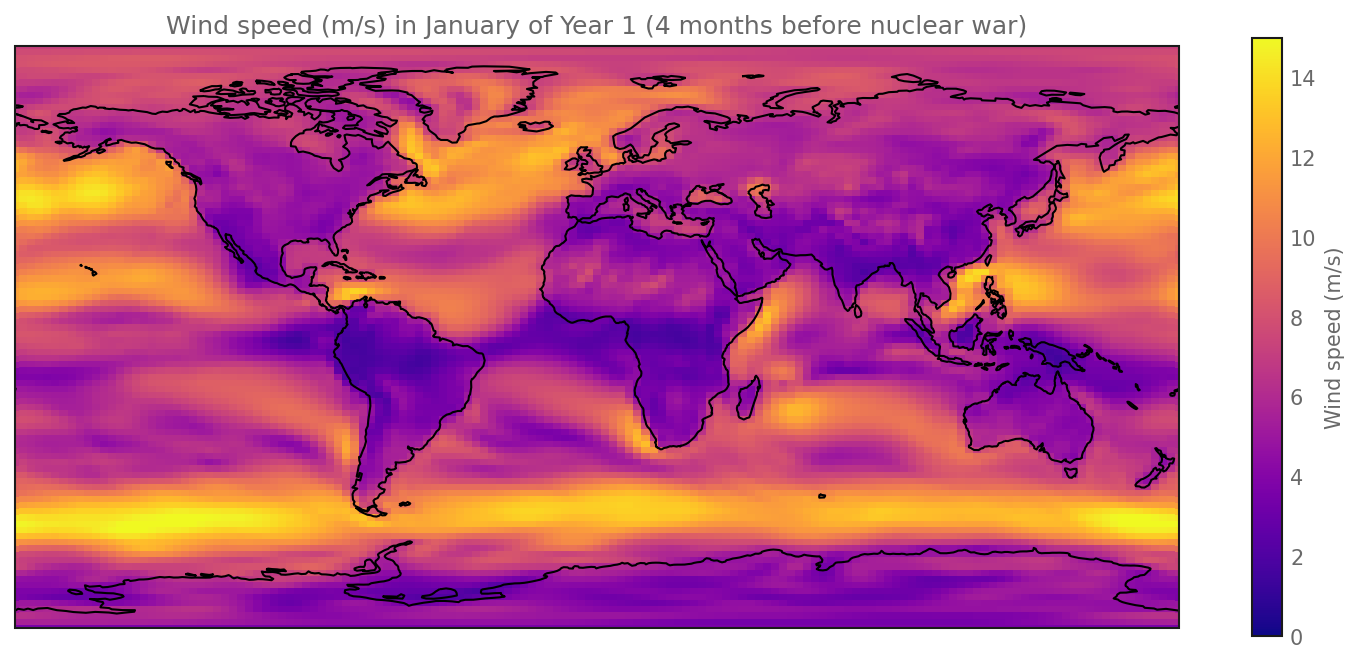

In [76]:
waccmwind.plot_map(year=1, month=1, sim="catastrophe", zmin=0, zmax=15, var="windspeed")

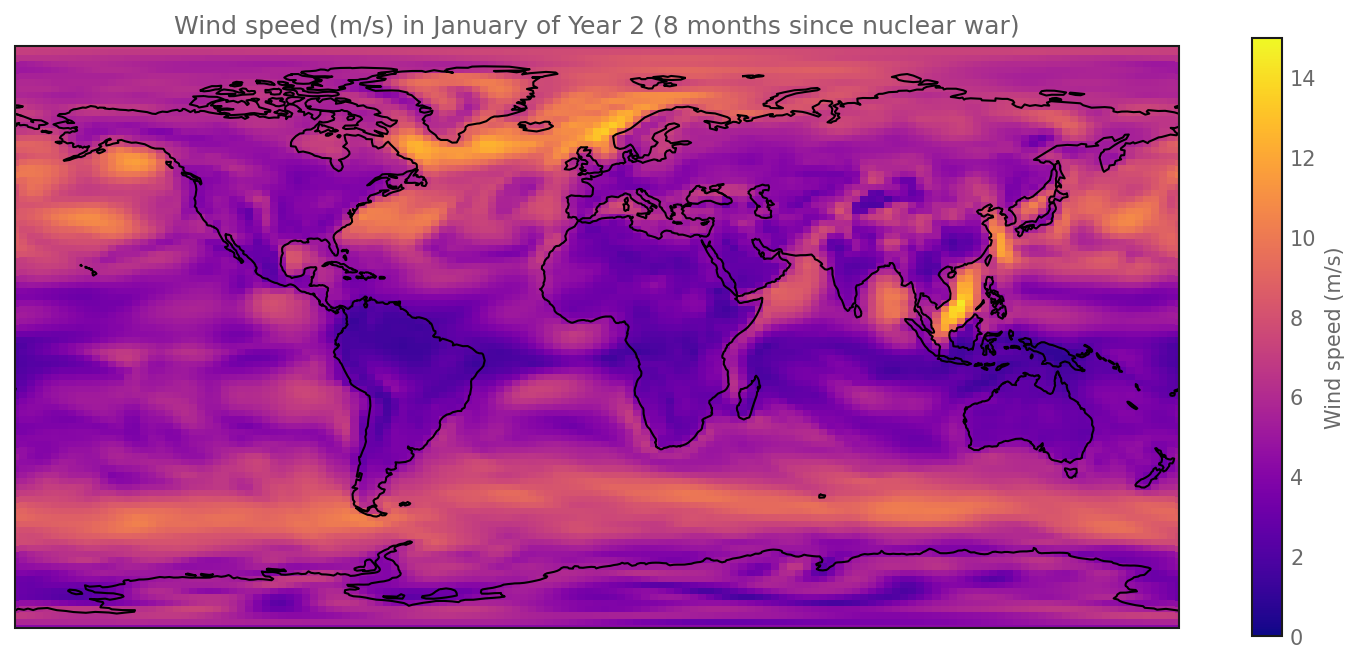

In [77]:
waccmwind.plot_map(year=2, month=1, sim="catastrophe", zmin=0, zmax=15, var="windspeed")

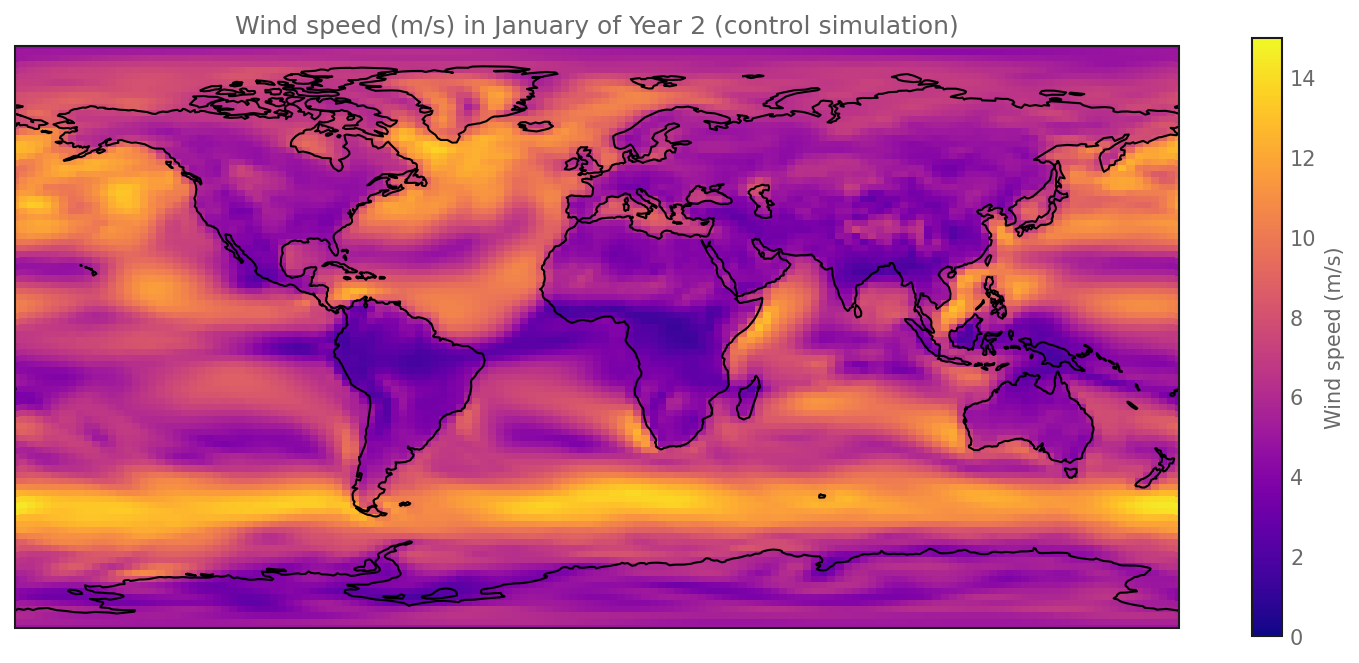

In [78]:
waccmwind.plot_map(year=2, month=1, sim="control", zmin=0, zmax=15, var="windspeed")

We can clearly see the drop in wind speed after the onset of the nuclear winter.

Now let's take a look at the wind farm data.

In [24]:
gem = GEM()

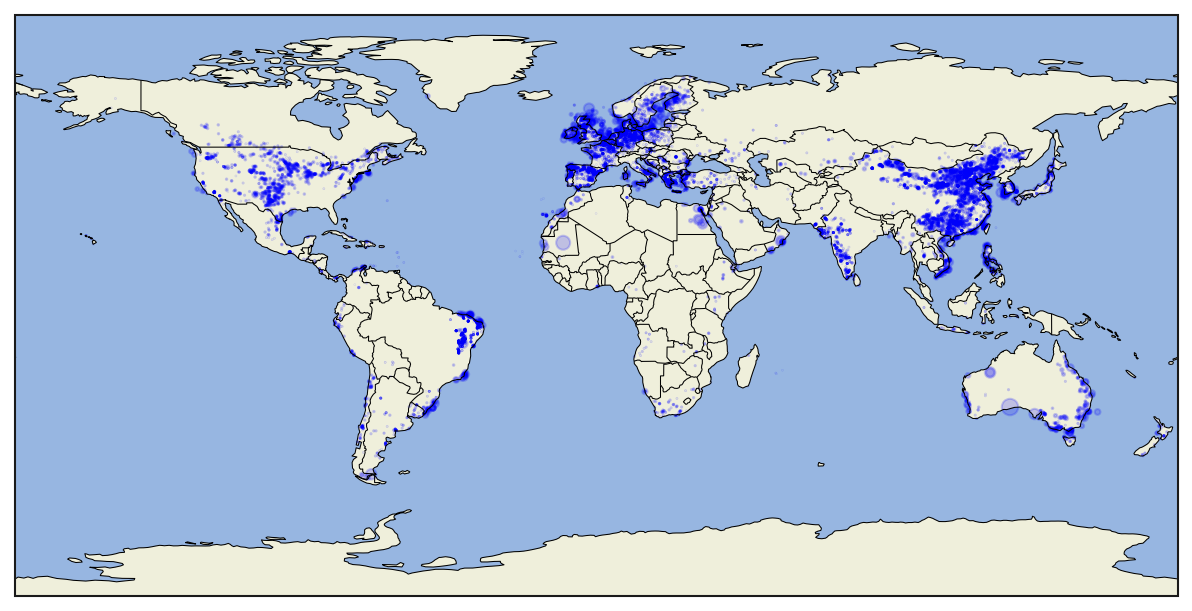

In [25]:
gem.plot_wind_farm_map()

We make a quick check to make sure the data makes sense. I am comparing the total *operating* wind capacity to reference values below. It all looks ok.

In [26]:
gem.sum_operating_wind_farms_per_country()

Country
China             342693.0
United States     144962.0
Germany            43875.0
India              35421.8
United Kingdom     28374.5
Name: Capacity (MW), dtype: float64

* China, 2021: 328 GW (https://en.wikipedia.org/wiki/Wind_power_in_China)
* US, 2022: 141 GW (https://en.wikipedia.org/wiki/Wind_power_in_the_United_States)
* Germany, 2021: 64 GW (https://en.wikipedia.org/wiki/Wind_power_in_Germany)
* India, 022, 42 GW (https://en.wikipedia.org/wiki/Wind_power_in_India)
* UK, 2022, 29 GW (https://en.wikipedia.org/wiki/Wind_power_in_the_United_Kingdom)

And now we do the *real* calculations. We query the climate model data for every wind farm in the database. That gives us a curve of the fraction of wind power accessible by that farm as a function of time during a nuclear winter. We then repeat this over all farms of a given country, to get the average change in wind power for that country (we weight each farm by its power capacity). Finally, we repeat this process for all countries. This is all written out in a csv file.

  0%|          | 0/8 [00:00<?, ?it/s]

             Country  Latitude  Longitude  Capacity (MW)            Status
0            Algeria  28.46240    -0.0576           10.0         operating
3             Angola -13.33410    14.8213           52.0  pre-construction
4             Angola -14.29001    14.2574           88.0  pre-construction
5             Angola -12.95400    15.4423           84.0  pre-construction
6             Angola -15.53240    13.7108           48.0  pre-construction
...              ...       ...        ...            ...               ...
27417  New Caledonia -22.31320   166.7644            5.0         operating
27418  New Caledonia -22.34400   166.7644            6.0         operating
27419  New Caledonia -22.32770   166.7848            5.0         operating
27420  New Caledonia -22.27550   166.7202            5.0         operating
27421  New Caledonia -22.26900   166.6611            4.0         operating

[24643 rows x 5 columns]


100%|██████████| 8/8 [00:07<00:00,  1.10it/s]


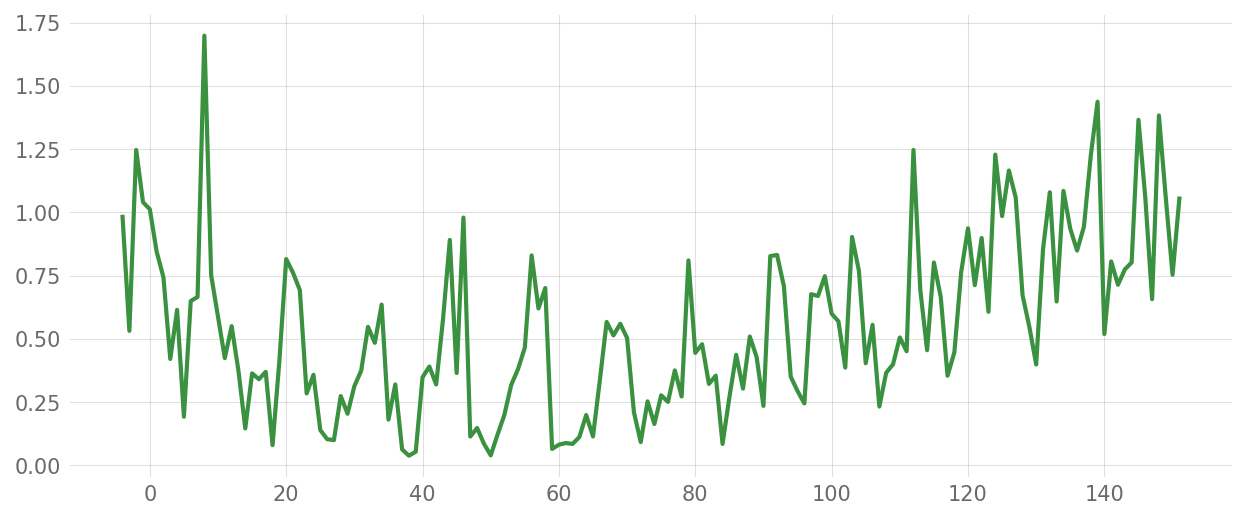

In [73]:
gem.get_all_country_wind_power_time_series()